In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\ASUS\Desktop\Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
import seaborn as sns

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


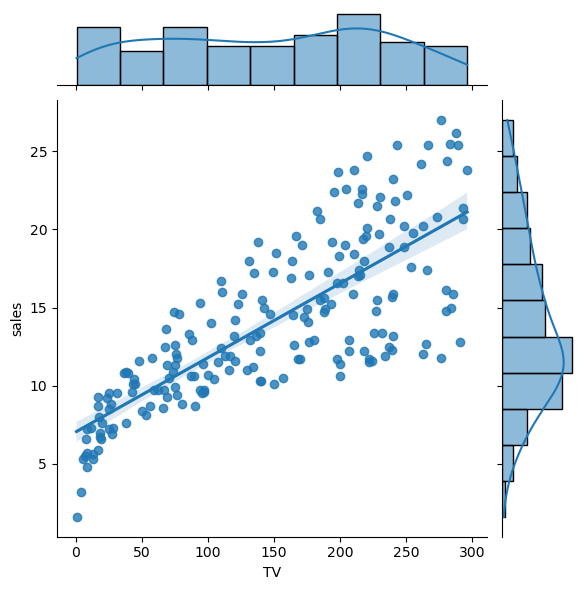

In [9]:
sns.jointplot(x="TV", y = "sales" , data = df, kind = "reg" );

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
X = df[["TV"]]

In [12]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [13]:
y = df[["sales"]]

In [14]:
reg = LinearRegression()

In [17]:
model = reg.fit(X, y)

In [18]:
model

LinearRegression()

In [19]:
model.intercept_

array([7.03259355])

In [20]:
model.coef_

array([[0.04753664]])

In [21]:
# rkare
model.score(X,y)

0.611875050850071

In [22]:
model.predict([[165]])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

In [23]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [24]:
gercek_y = y[0:10]

In [26]:
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])

In [27]:
hatalar = pd.concat([gercek_y, tahmin_edilen_y], axis = 1 )

In [28]:
hatalar.columns = ["gercek_y" , "tahmin_edilen_y"]

In [29]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [30]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [32]:
hatalar["hata_kare"] = hatalar["hata"]**2

In [33]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [36]:
import numpy as np
np.mean(hatalar["hata_kare"])

9.290350329638104